In [1]:
#!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [2]:
# Import necessary libraries
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
# Load the model from a local path
model = YOLO('best_new.pt')  # Load your custom model directly



image 1/1 c:\Users\aarus\Documents\Monashh\SEM7\ECE4191\ECE4191-E5-tennibot\notebooks\scratchspace\computer_vision\yolo\test_image\tennis.jpg: 384x640 1 tennis-ball, 144.6ms
Speed: 4.0ms preprocess, 144.6ms inference, 10.1ms postprocess per image at shape (1, 3, 384, 640)


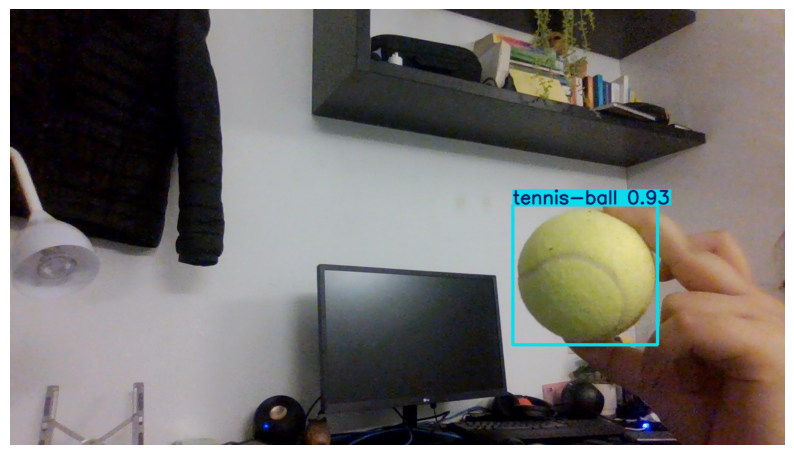

In [3]:
# Run inference on the image
results = model('test_image/tennis.jpg')

# Display results for the first image (results can be a list)

# Display results for the first image
for result in results:
    # Get the image with predictions drawn on it
    image_with_predictions = result.plot()  # This gets the image with predictions
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB)

    # Display the image in Jupyter Notebook
    plt.figure(figsize=(10, 10))  # Set the figure size
    plt.imshow(image_rgb)  # Use imshow to display the RGB image
    plt.axis('off')  # Turn off axis
    plt.show()  # Render the image

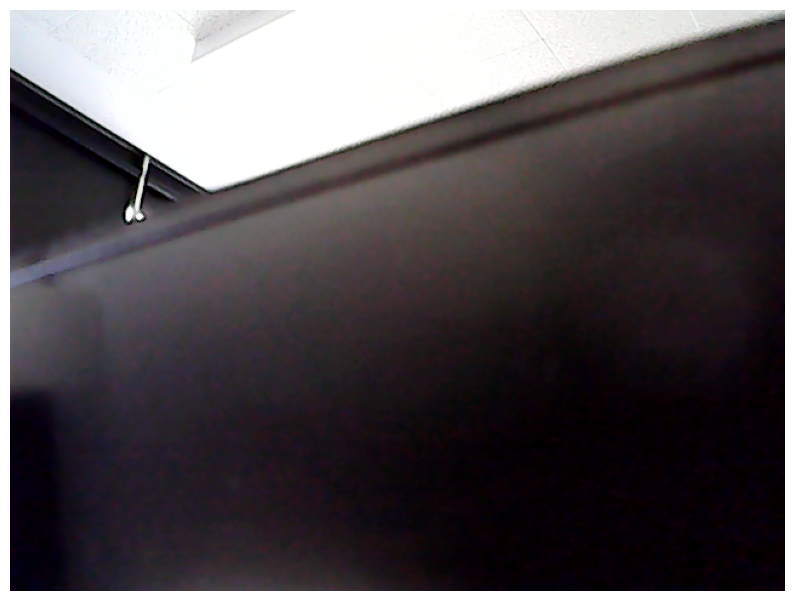

Error: Failed to capture image.
Error: Failed to capture image.
Error: Failed to capture image.
Error: Failed to capture image.
Error: Failed to capture image.
Error: Failed to capture image.
Error: Failed to capture image.
Error: Failed to capture image.
Error: Failed to capture image.


In [5]:
import cv2
import numpy as np
import time
import torch
from IPython import display
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Make sure to import YOLO from the ultralytics package
%matplotlib inline

class TennisBallDetector:
    def __init__(self, model):
        # Load YOLOv8 model
        self.model = model
        # Initialize the camera
        self.camera = cv2.VideoCapture(0)  # Use 0 for the default camera on Raspberry Pi or adjust for other cameras

        
        if not self.camera.isOpened():
            print("Error: Could not open USB camera.")
            exit()

    def detect(self, retry=True, max_num_retries=20, retry_interval=1):
        counter = 0

        try:
            while True:
                # Capture frame from the camera
                ret, self.frame = self.camera.read()
                if not ret:
                    print("Error: Failed to capture image.")
                    if not retry or counter >= max_num_retries:
                        return False
                    counter += 1
                    time.sleep(retry_interval)
                    continue
                
                # Run YOLOv8 object detection on the frame
                results = self.model(self.frame)  # Using YOLOv8 model for detection

                # Access the first result in the list
                if len(results) > 0:
                    detected_objects = results[0].boxes  # Access the boxes attribute
                else:
                    detected_objects = None  # Handle case where no results are returned

                # Draw detected objects on the frame
                if detected_objects is not None:
                    for box in detected_objects.data:  # Accessing bounding box data directly
                        # Get bounding box coordinates
                        x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()

                        # Draw bounding box and label
                        cv2.rectangle(self.frame, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
                        label = f"Class {int(class_id)}: {confidence:.2f}"
                        cv2.putText(self.frame, label, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                # Display the frame with bounding boxes
                frame_rgb = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
                display.clear_output(wait=True)
                plt.figure(figsize=(10, 10))  # Set the figure size for better visualization
                plt.imshow(frame_rgb)  # Use imshow to display the RGB image
                plt.axis('off')  # Turn off axis
                plt.show()  # Render the image

                # Break out of the loop if 'q' is pressed
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

        except KeyboardInterrupt:
            pass
        except Exception as e:
            print(f"Error in detector.detect(). {e}")
        
        # Release camera and close windows
        self.camera.release()
        cv2.destroyAllWindows()

# Example usage. Remember to run the above cell that loads the model FIRST
detector = TennisBallDetector(model)  # model is loaded in the above cell
detector.detect()
